In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load images
raw = cv2.imread("images/CanonEOS5D/scaled-im07-raw.png")
actual = cv2.imread("images/CanonEOS5D/scaled-im07-jpg.png")

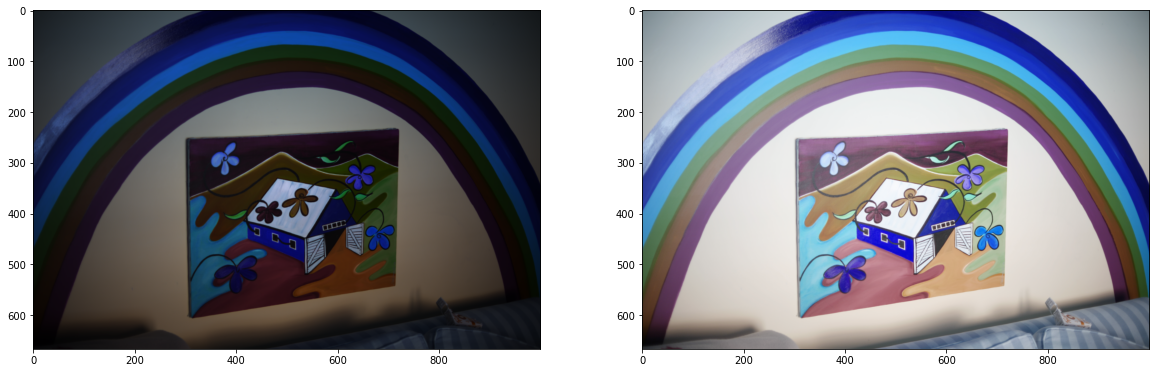

In [4]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(raw)
plt.subplot(122)
plt.imshow(actual)

# Implementation

## Unsharp masking
- Sharpen details

In [5]:
from scipy.ndimage.filters import median_filter

In [27]:
raw_gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY) # Grayscale
raw_median = median_filter(raw_gray, 1) # Remove noise - Use gaussianblur instead?
raw_lap = cv2.Laplacian(raw_median, cv2.CV_64F) # Edge detector - Find out what CV_64F is
sharp = raw_gray - 0.7*raw_lap # Remove from og ?

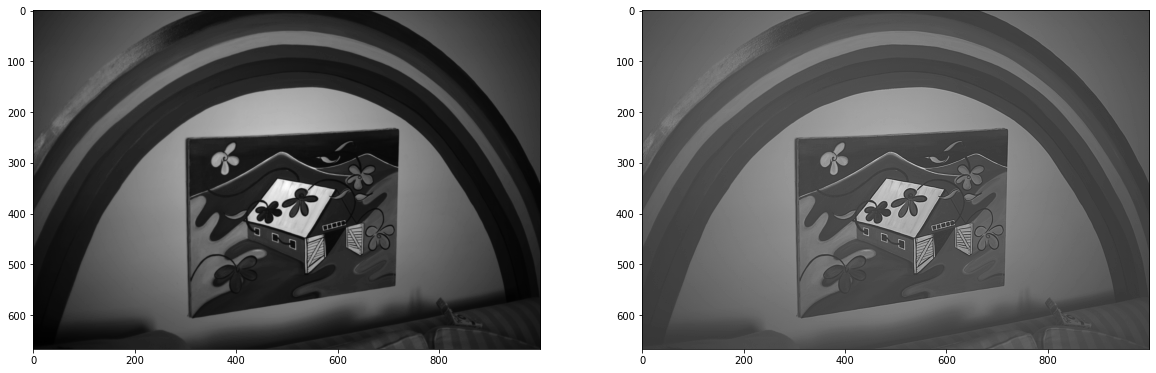

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(raw_gray, cmap="gray")
plt.subplot(122)
plt.imshow(sharp, cmap="gray")

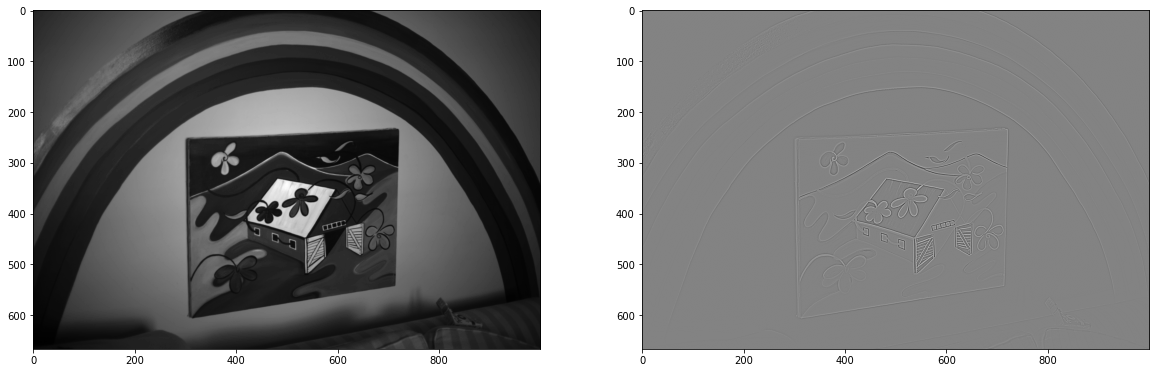

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(raw_gray, cmap="gray")
plt.subplot(122)
plt.imshow(raw_lap, cmap="gray")

## Homomorphic filtering
- Remove multiplicative noise (F.ex illumination and reflection)

In [33]:
def gaussian_filter(I_shape, filter_params):
    P = I_shape[0]/2
    Q = I_shape[1]/2
    H = np.zeros(I_shape)
    U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
    Duv = (((U-P)**2+(V-Q)**2)).astype(float)
    H = np.exp((-Duv/(2*(filter_params[0])**2)))
    return (1 - H)

In [34]:
# First ln(non-linear mapping)
raw_log = np.log1p(np.array(raw_gray, dtype="float"))

# H (linear filtering) - gaussian in this case
    # FFT
    # H
    # IFFT
raw_fft = np.fft.fft2(raw_log)

a = 0.75
b = 1.25
raw_H = gaussian_filter(I_shape=raw_fft.shape, filter_params=[30,2])
H = np.fft.fftshift(raw_H)
raw_filtered = (a + b*H)*raw_fft

raw_ifft = np.fft.ifft2(raw_filtered)

# e(inverse mapping)
raw_inverse = np.exp(np.real(raw_ifft))-1

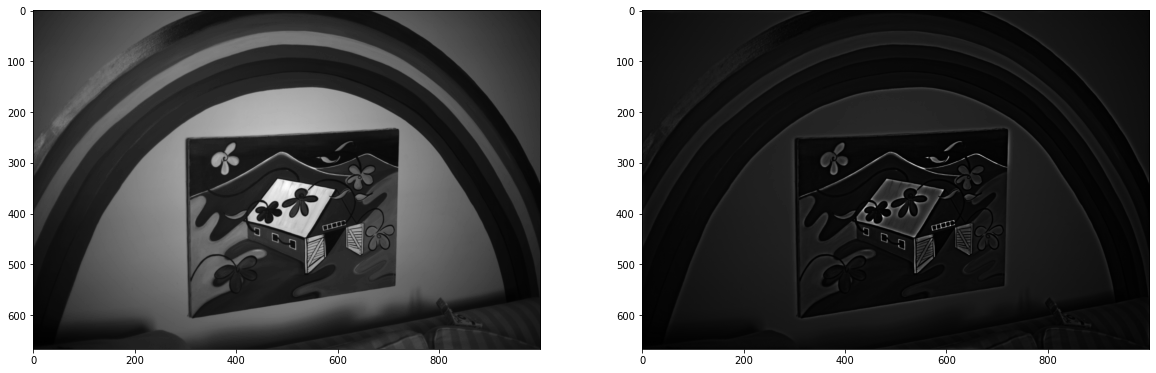

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(raw_gray, cmap="gray")
plt.subplot(122)
plt.imshow(raw_inverse, cmap="gray")

## Flatfielding